Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Top 5 rows of our Dataset

Attribute Information:

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Checking the Shape of our dataset

In [8]:
data.shape

(8124, 23)

There are 8124 Rows and 23 Columns in this dataset

In [9]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data is categorical hence descibe() is not showing maximum information, but it is showing us that our target variable Class has 2 unique values

Let's us check if there is any null values in any of our columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No null values or missing item in any column and data is of Object type

Now Let's count the frequency of our target variable categories

In [10]:
data['class'].value_counts()


e    4208
p    3916
Name: class, dtype: int64

Edible(e) constitute 4208 and Poisonous(p) constitutes 3916, The count of Edible mushrooms are greater.

Let's plot this information

<AxesSubplot:xlabel='class', ylabel='count'>

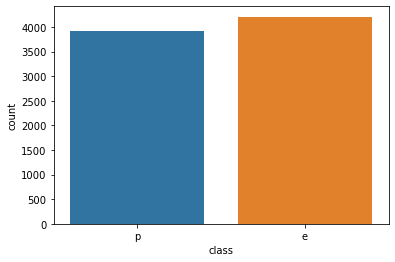

In [7]:
sns.countplot(data['class'])

<Figure size 1008x432 with 0 Axes>

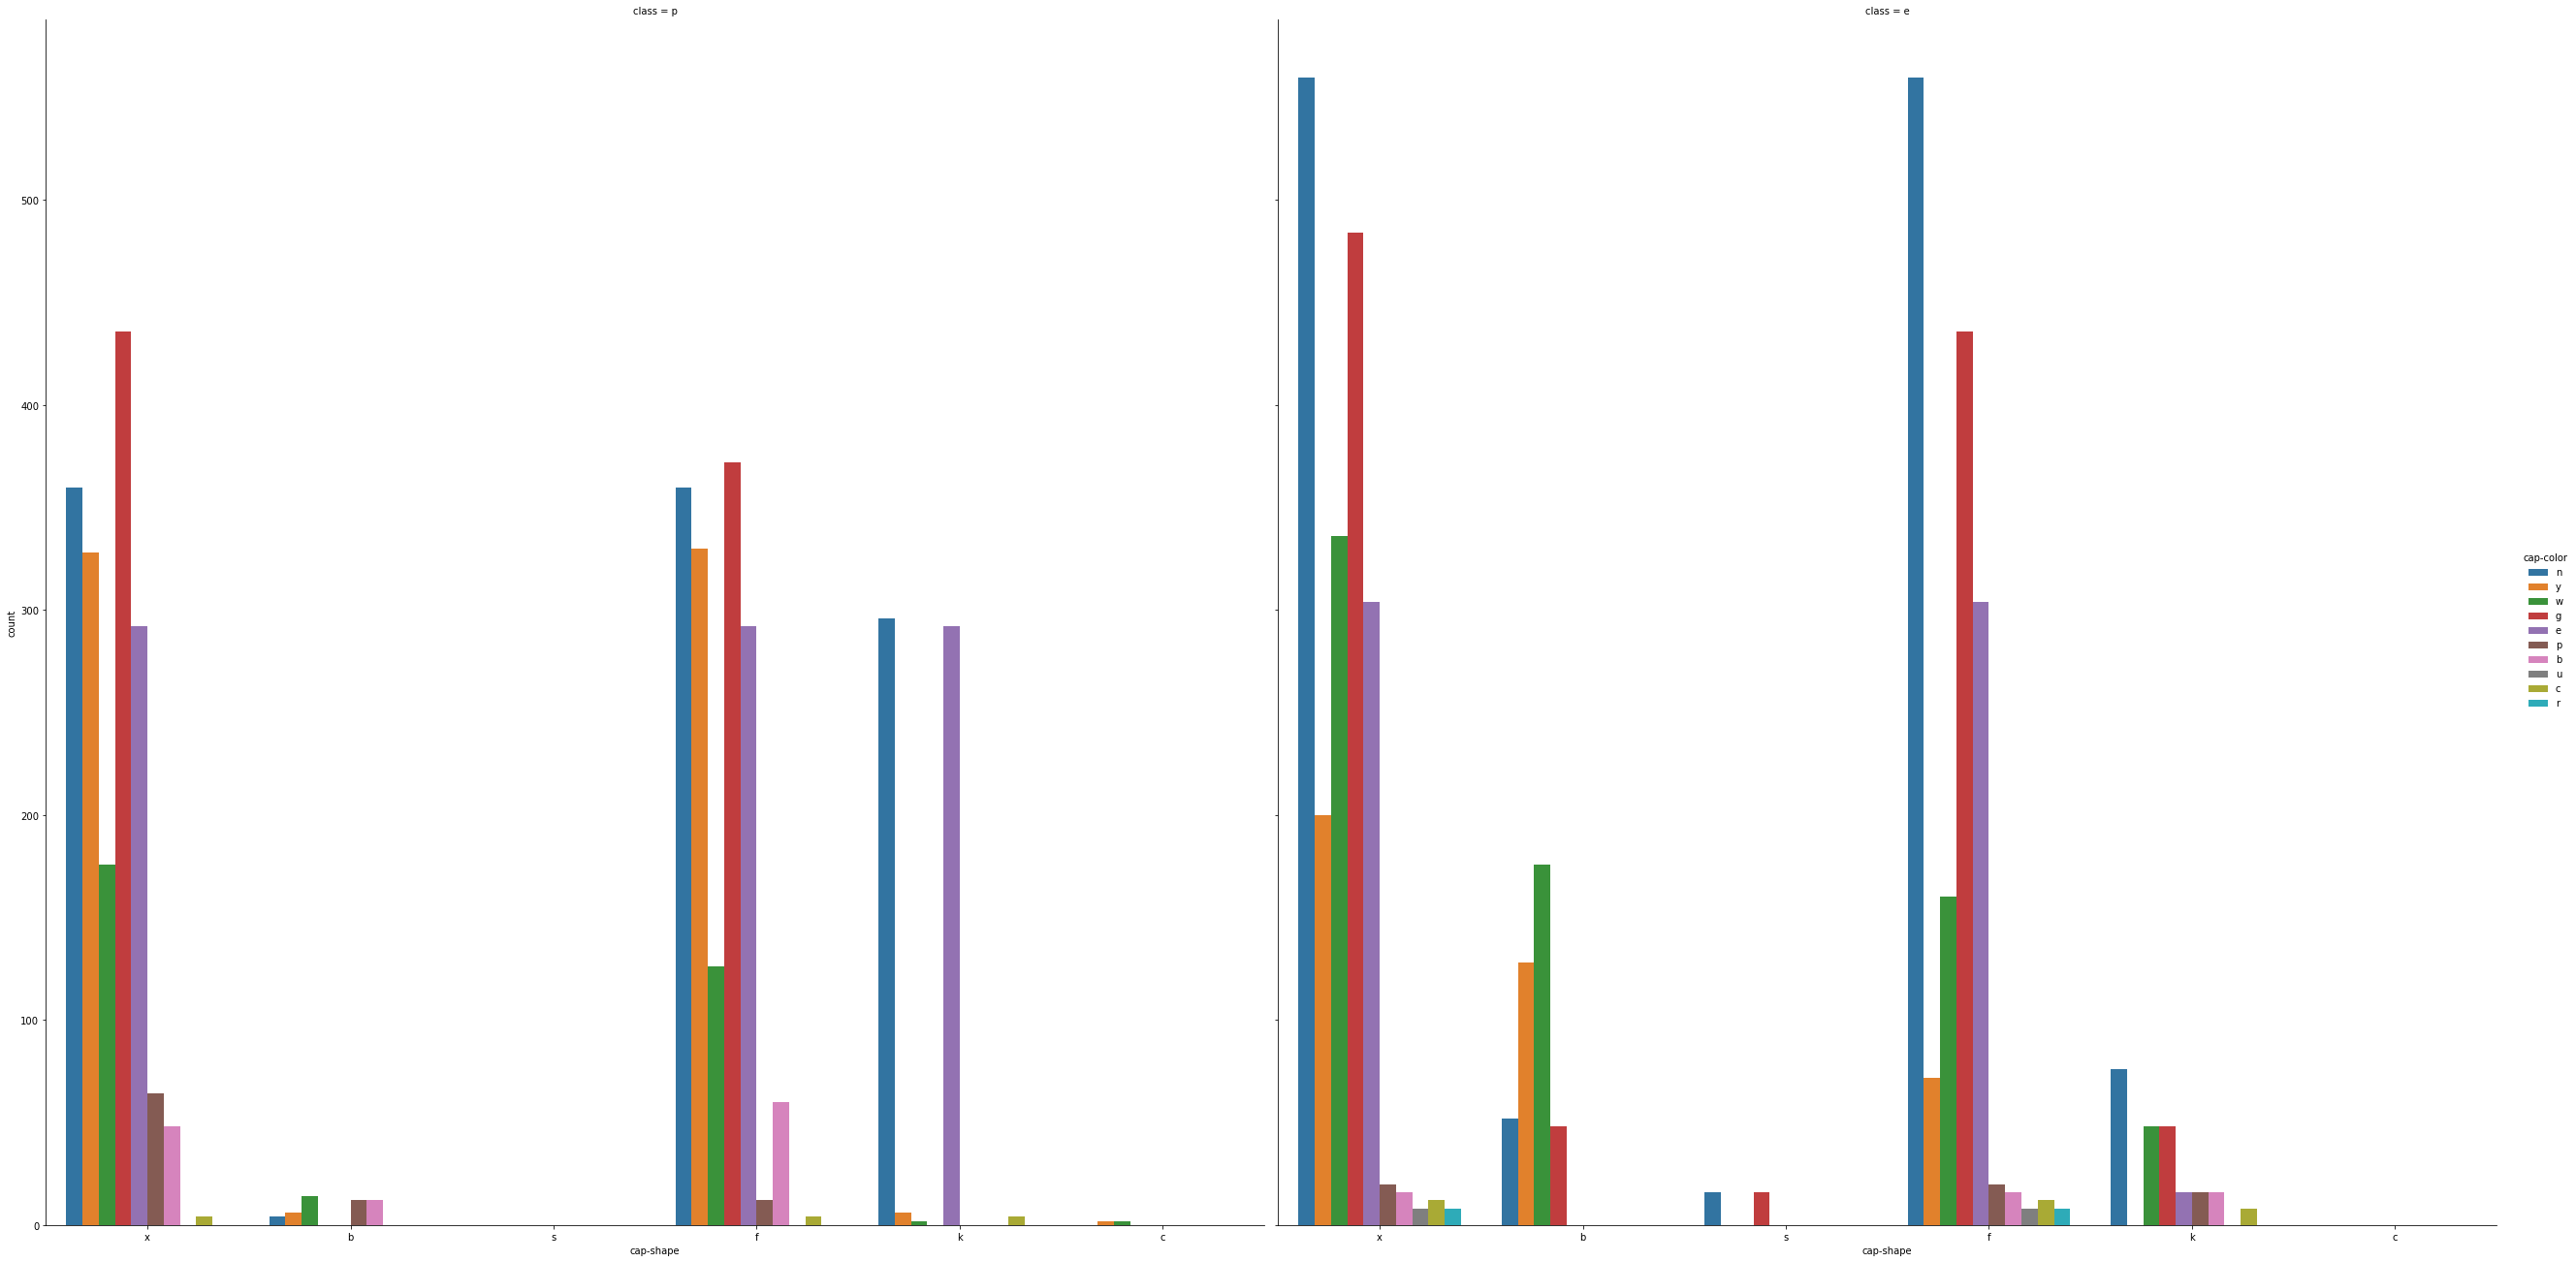

In [11]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'cap-shape', hue ='cap-color', col ='class', data = data, kind = 'count', height = 18, aspect = 1);

Purple Building(e) in k(cap-shape) is taller in poisonous mushroom
Green building(w) in b(cap-shape) is tallet in Edible mushrooms

<Figure size 1008x432 with 0 Axes>

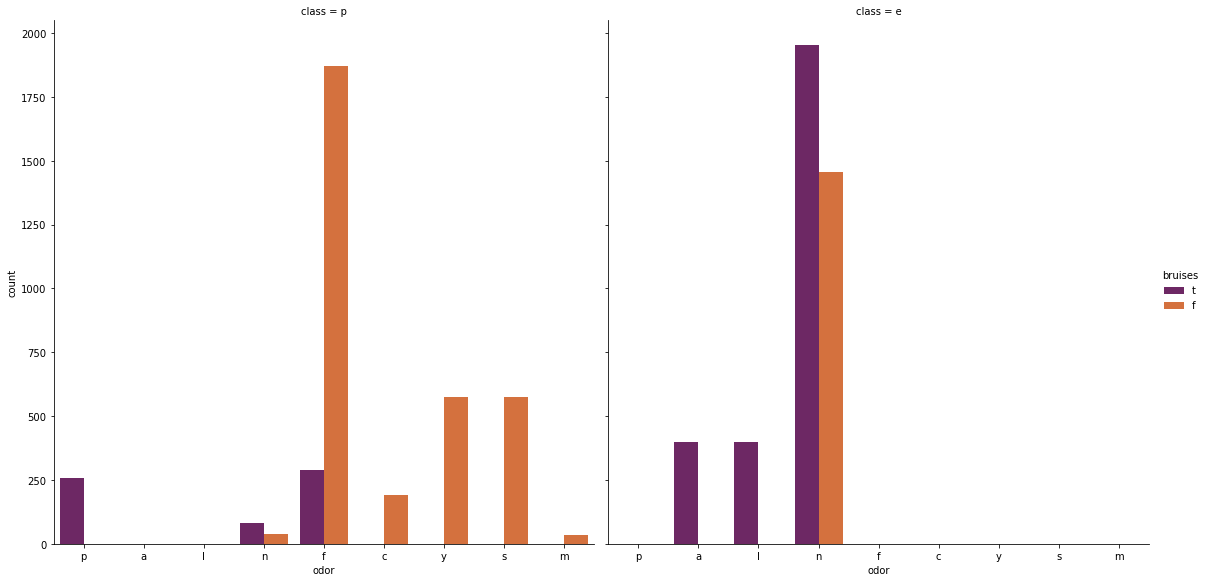

In [12]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'odor', hue = 'bruises', col = 'class', data = data, kind ='count', height = 8, aspect = 1, palette = 'inferno' );

Purple(t-bruises) Building in n(odor) in poisonous is smaller than in edible
Orange(f-bruises)Building in f(odor) in poisonous is larger than in edible 

<Figure size 1008x432 with 0 Axes>

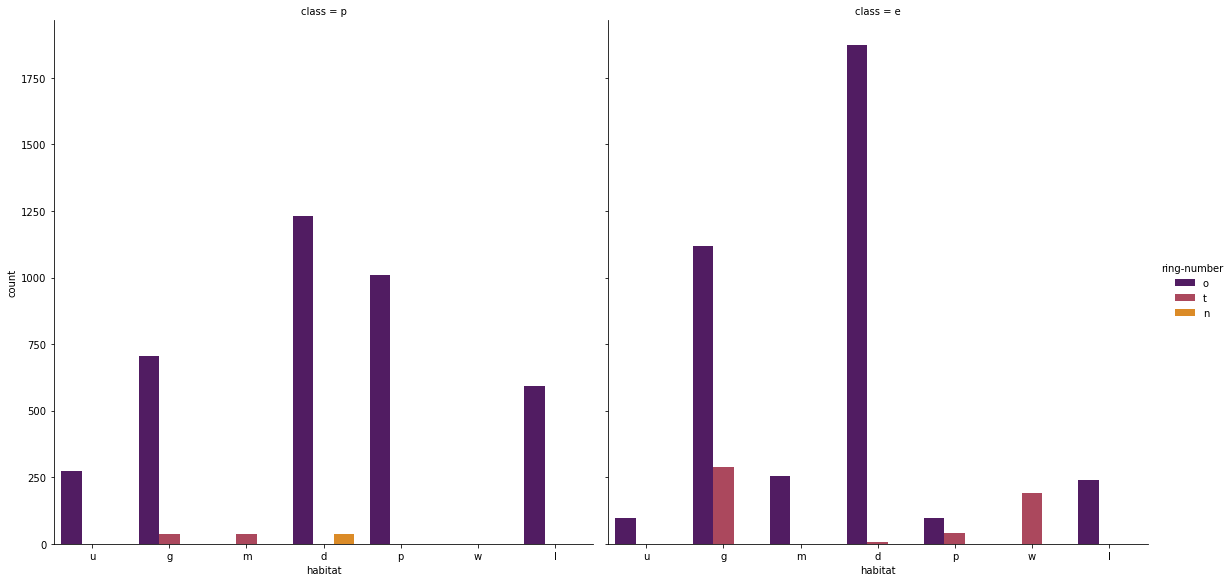

In [13]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'habitat', hue = 'ring-number', col = 'class', data = data, kind ='count', height = 8, aspect = 1, palette = 'inferno' );

There is no poisonous mushroom in waste habitat
No Edible mushroom with no ring number
Edible mushrooms mainly occurs in grasses and woods

<Figure size 1008x432 with 0 Axes>

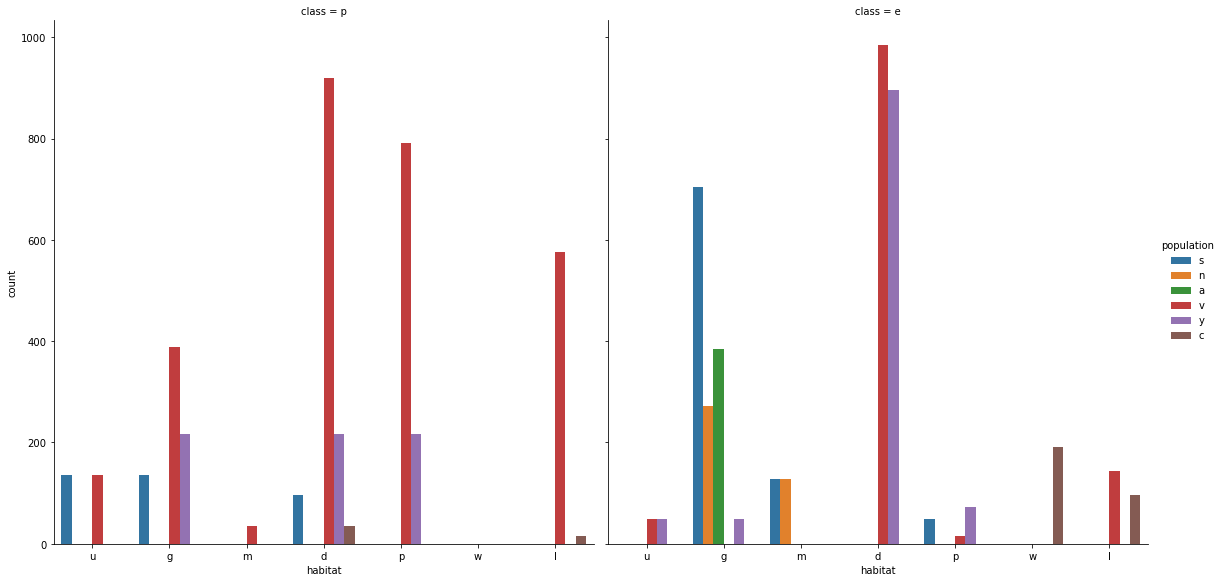

In [14]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'habitat', hue = 'population', col = 'class', data = data, kind ='count', height = 8, aspect = 1);

Poisonous Mushrooms are not present in numerous and abundant population
In grasses and woods, Edible mushrooms are present as scattered and abundant and numerous
In Waste habitat we can find only Edible mushrooms in clustered manner

<Figure size 1008x432 with 0 Axes>

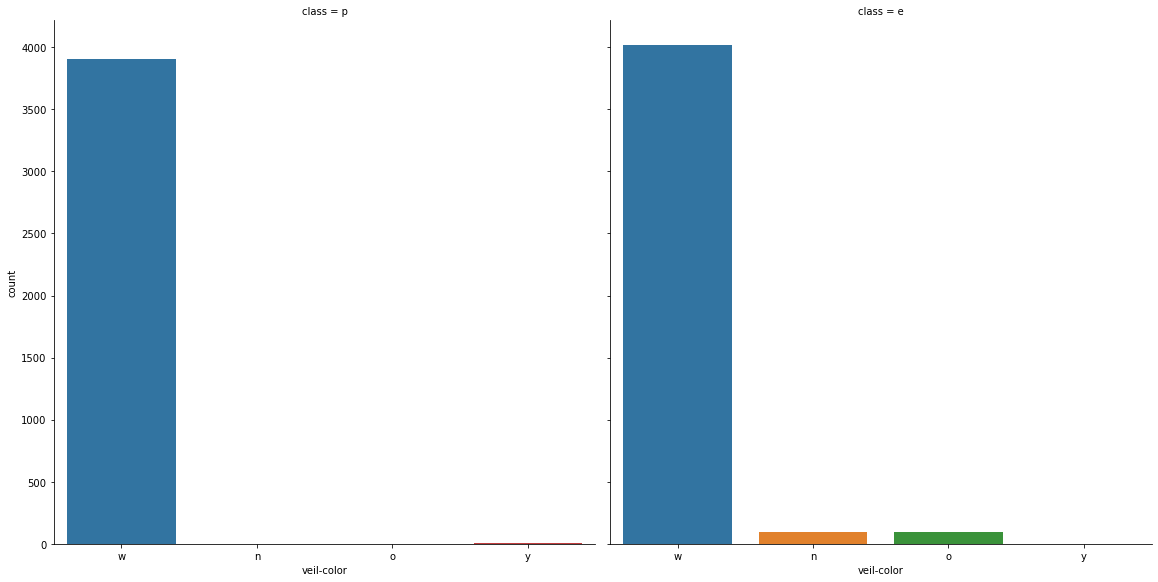

In [15]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'veil-color', col = 'class', data = data, kind ='count', height = 8, aspect = 1);

Majority of the mushrooms are white in veil-color
No brown and orange veil-color mushrooms are poisonous
Yellow veil-color mushrooms are always poisonous

<Figure size 1008x432 with 0 Axes>

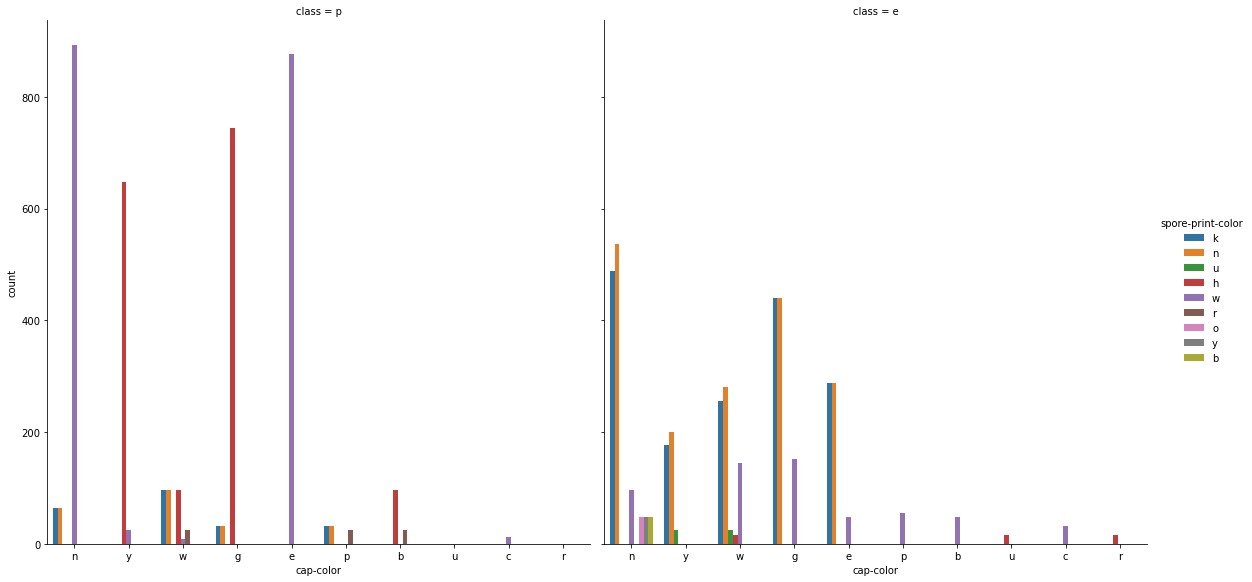

In [16]:
plt.figure(figsize = (14,6))
g = sns.catplot(x = 'cap-color', hue = 'spore-print-color', col = 'class', data = data, kind ='count', height = 8, aspect = 1);

Poisonous Mushrooms mostly occurs in cap-color of brown=n,gray=g,red=e,yellow=y 
There are no green and purple cap-color for poisonous mushrooms
No poisonous Mushrooms with purple spore-print-color

# # Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lencoded_data = data.apply(LabelEncoder().fit_transform)
lencoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


1 represent Poisonous and 0 represnt edible in column class

In [18]:
y = lencoded_data['class']
x = lencoded_data.drop(['class'], axis = 1)

# # Checking Multicollinearity

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [20]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

In [21]:
vif

,vif,Features
0,1.043031,cap-shape
1,1.254300,cap-surface
2,1.566327,cap-color
3,6.172082,bruises
4,1.839415,odor
5,6.956323,gill-attachment
6,4.107406,gill-spacing
7,3.995689,gill-size
8,2.294605,gill-color
9,4.640069,stalk-shape


All VIF values are less than 10, that means no significant multicollinearity exist.

In [23]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.25, random_state=1)

# #Logistic Regression

In [24]:
log_reg = LogisticRegression()

In [25]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [26]:
log_reg.score(x_train, y_train)

0.9492860659773511

In [27]:
LogisticRegression()

LogisticRegression()

In [28]:
y_pred = log_reg.predict(x_test)

In [29]:
log_reg.score(x_test, y_test)

0.9532250123092073

In [30]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
accuracy

0.9532250123092073

# # Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [33]:
dt.score(x_train, y_train)

0.9780075496471361

In [34]:
predictions = dt.predict(x_test)
dt.score(x_test, y_test)

0.983259478089611

In [35]:
accuracy_score(y_test, predictions)

0.983259478089611

# # Random forest Model

In [36]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [37]:
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=5)

In [38]:
rf.score(x_train, y_train)

0.9908091252256688

In [39]:
predictions = rf.predict(x_test)
rf.score(x_test, y_test)

0.9881831610044313

In [40]:
accuracy_score(y_test, predictions)

0.9881831610044313

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_clf = GradientBoostingClassifier()

In [63]:
gbdt_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [64]:
gbdt_clf.score(x_train, y_train)

1.0

In [65]:
predict_gbdt = gbdt_clf.predict(x_test)
gbdt_clf.score(x_test, y_test)

1.0

In [61]:
accuracy_score(y_test, predict_gbdt)

ValueError: Found input variables with inconsistent numbers of samples: [2031, 6093]

# #Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1, 1, 0.1),
    'min_samples_split' : range(4,8,2)
}

grid = GridSearchCV(gbdt_clf, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [71]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4}

In [74]:
gbdt_clf = GradientBoostingClassifier(
    max_depth =  6, min_samples_split = 4, learning_rate =  0.1
)

In [75]:
gbdt_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=4)

In [76]:
predict_gbdt = gbdt_clf.predict(x_train)

In [77]:
gbdt_clf.score(x_train, y_train)

1.0

In [79]:
accuracy_score(y_train, predict_gbdt)

1.0